## Running Using Jupyter

To execute code in a cell, press `Crtl` + `Enter`, click on the `[ > ]Run` button in the main menu, or press `Shift` + `Enter` if you wish to execute the code and then move on to a new cell (creating it if it does not already exist).

## Libraries

We have included the necessary libraries that is required for the code to get executed. The one we are going to use is the Python API, [PyMongo].  MongoDB instance on your VM should already be running, but to check this, we will run a bash command in the next cell. In case, if it is throwing an error, go to the terminal and type sudo service mongod start command. This uses the Jupyter "magics", and requires that the first line include `%%bash`.  Click on the following cell, and execute it:

In [1]:
import pandas as pd
import json
import csv
import numpy as np
import sys, getopt, pprint
import pymongo
import re
from pymongo import MongoClient
from datetime import datetime
from dateutil import parser
from collections import OrderedDict
from pprint import pprint

In [2]:
%%bash
service mongod status

mongod start/running, process 9790


In [2]:
client = MongoClient('mongodb://localhost:27017')
client.database_names()# Create database and collection objects for convenience

['MyDB', 'admin', 'enron', 'local', 'test']

In [12]:
class CSVfile:
# read a specific rows 
    def readCSVFile(self,fileName,numberOfRows):
        # read csv file and save it as dataFram
        df = pd.read_csv(fileName,  nrows= numberOfRows)
        # remove any space from colum name
        df.columns = df.columns.str.replace('\s+', '') 
        return df
    # read all CSV file
    def readAllCSVFile(self,fileName):
        # read csv file and save it as dataFram
        df = pd.read_csv(fileName)
        # remove any space from colum name
        df.columns = df.columns.str.replace('\s+', '')  
        return df

    def removeColumn(self,df,list_column_name):
        counter =0
        for c in list_column_name:
            df.drop(df.columns[c-counter],axis=1,inplace=True)
            counter=counter+1
        return df

    def printHead(self,df):
        print(df.head())

    def summaryStatistics(self,df):
        print(df.describe())

    def printColumn_name(self,df):
        print(df.columns.values)

    def convertDataFrameToCSV(self,df):
        filename = 'temp.csv'
        return df.to_csv(filename)

    def convertFromDataFrame_To_Json(self,df,f):
        myJSON = df.to_json(path_or_buf = None, 
                            orient = 'records',
                             date_format = 'epoch', 
                             double_precision = 10, 
                            force_ascii = True, 
                            date_unit = 'ms', 
                            default_handler = None)
        with open(f,"w+") as output_file:
            output_file.write(myJSON)

    def convertFromDataFrame_To_CSV(self,df,fileName):
        with open(fileName, 'a') as f:
            df.to_csv(f,index=False)
        return fileName

In [13]:
fileName_green ='green_tripdata_2015-01.csv'

#Columns which might use .
cols_to_use = [1,2,5,6,7,8,9,10,11,18,19]
data = pd.read_csv(fileName_green, index_col=False, usecols=cols_to_use)

object_green = CSVfile()
object_green.printColumn_name(data)
print(data)

['lpep_pickup_datetime' 'Lpep_dropoff_datetime' 'Pickup_longitude'
 'Pickup_latitude' 'Dropoff_longitude' 'Dropoff_latitude' 'Passenger_count'
 'Trip_distance' 'Fare_amount' 'Total_amount' 'Payment_type']
        lpep_pickup_datetime Lpep_dropoff_datetime  Pickup_longitude  \
0        2015-01-01 00:34:42   2015-01-01 00:38:34        -73.922592   
1        2015-01-01 00:34:46   2015-01-01 00:47:23        -73.952751   
2        2015-01-01 00:34:44   2015-01-01 00:38:15        -73.843010   
3        2015-01-01 00:34:48   2015-01-01 00:38:08        -73.860825   
4        2015-01-01 00:34:53   2015-01-01 01:09:10        -73.945183   
5        2015-01-01 00:34:55   2015-01-01 00:40:58        -73.966812   
6        2015-01-01 00:34:49   2015-01-01 00:53:10        -73.930489   
7        2015-01-01 00:35:03   2015-01-01 00:35:08        -73.863899   
8        2015-01-01 00:35:13   2015-01-01 00:41:04        -73.917130   
9        2015-01-01 00:35:09   2015-01-01 00:42:39        -73.921402   
10 

In [14]:
data = data.dropna(how='all')
print(data['lpep_pickup_datetime'])

0          2015-01-01 00:34:42
1          2015-01-01 00:34:46
2          2015-01-01 00:34:44
3          2015-01-01 00:34:48
4          2015-01-01 00:34:53
5          2015-01-01 00:34:55
6          2015-01-01 00:34:49
7          2015-01-01 00:35:03
8          2015-01-01 00:35:13
9          2015-01-01 00:35:09
10         2015-01-01 00:34:56
11         2015-01-01 00:34:59
12         2015-01-01 00:35:07
13         2015-01-01 00:35:01
14         2015-01-01 00:35:12
15         2015-01-01 00:35:14
16         2015-01-01 00:35:29
17         2015-01-01 00:35:33
18         2015-01-01 00:35:13
19         2015-01-01 00:35:23
20         2015-01-01 00:35:26
21         2015-01-01 00:35:40
22         2015-01-01 00:35:35
23         2015-01-01 00:35:36
24         2015-01-01 00:35:41
25         2015-01-01 00:35:43
26         2015-01-01 00:35:25
27         2015-01-01 00:35:44
28         2015-01-01 00:35:38
29         2015-01-01 00:35:21
                  ...         
1508471    2015-01-31 23:00:49
1508472 

In [16]:
def removeRow_if_some_fields_empty(df,list_column_name):
    for c in list_column_name:
        df.dropna(subset=[c], inplace=True)
    return df

In [17]:
list_column_name = ['lpep_pickup_datetime','Lpep_dropoff_datetime','Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude']
new_df = removeRow_if_some_fields_empty(data,list_column_name)
print(new_df)

        lpep_pickup_datetime Lpep_dropoff_datetime  Pickup_longitude  \
0        2015-01-01 00:34:42   2015-01-01 00:38:34        -73.922592   
1        2015-01-01 00:34:46   2015-01-01 00:47:23        -73.952751   
2        2015-01-01 00:34:44   2015-01-01 00:38:15        -73.843010   
3        2015-01-01 00:34:48   2015-01-01 00:38:08        -73.860825   
4        2015-01-01 00:34:53   2015-01-01 01:09:10        -73.945183   
5        2015-01-01 00:34:55   2015-01-01 00:40:58        -73.966812   
6        2015-01-01 00:34:49   2015-01-01 00:53:10        -73.930489   
7        2015-01-01 00:35:03   2015-01-01 00:35:08        -73.863899   
8        2015-01-01 00:35:13   2015-01-01 00:41:04        -73.917130   
9        2015-01-01 00:35:09   2015-01-01 00:42:39        -73.921402   
10       2015-01-01 00:34:56   2015-01-01 00:44:39        -73.912689   
11       2015-01-01 00:34:59   2015-01-01 00:56:16        -73.918152   
12       2015-01-01 00:35:07   2015-01-01 00:57:02        -73.99

In [19]:
def non_numerics_columns(df):
    non_numerics = [x for x in df.columns \
                if not (df[x].dtype == np.float64 \
                        or df[x].dtype == np.int64)]
    return non_numerics

In [20]:
non_numerics = non_numerics_columns(new_df)
print(non_numerics)

['lpep_pickup_datetime', 'Lpep_dropoff_datetime']


In [23]:
def numerics_columns(df,non_numerics):
    numerics = [x for x in df.columns if x not in non_numerics]
    return numerics

In [24]:
numerics = numerics_columns(new_df,non_numerics)
print(numerics)

['Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count', 'Trip_distance', 'Fare_amount', 'Total_amount', 'Payment_type']


In [25]:
def replace_empty_fields_in_numerics_columns(df,numerics):
    for c in numerics:
        df[c].fillna(-1, inplace=True)
    return df

In [26]:
new_df = replace_empty_fields_in_numerics_columns(new_df,numerics)
print(new_df)

        lpep_pickup_datetime Lpep_dropoff_datetime  Pickup_longitude  \
0        2015-01-01 00:34:42   2015-01-01 00:38:34        -73.922592   
1        2015-01-01 00:34:46   2015-01-01 00:47:23        -73.952751   
2        2015-01-01 00:34:44   2015-01-01 00:38:15        -73.843010   
3        2015-01-01 00:34:48   2015-01-01 00:38:08        -73.860825   
4        2015-01-01 00:34:53   2015-01-01 01:09:10        -73.945183   
5        2015-01-01 00:34:55   2015-01-01 00:40:58        -73.966812   
6        2015-01-01 00:34:49   2015-01-01 00:53:10        -73.930489   
7        2015-01-01 00:35:03   2015-01-01 00:35:08        -73.863899   
8        2015-01-01 00:35:13   2015-01-01 00:41:04        -73.917130   
9        2015-01-01 00:35:09   2015-01-01 00:42:39        -73.921402   
10       2015-01-01 00:34:56   2015-01-01 00:44:39        -73.912689   
11       2015-01-01 00:34:59   2015-01-01 00:56:16        -73.918152   
12       2015-01-01 00:35:07   2015-01-01 00:57:02        -73.99

In [27]:
file_csv = object_green.convertFromDataFrame_To_CSV(new_df,'newgreen2015.csv')

In [3]:

%%bash
mongoimport --db MyDB --collection newgreen_2015 --type csv --headerline --file newgreen2015.csv --jsonArray

2018-01-09T20:55:49.648+0000	connected to: localhost
2018-01-09T20:55:52.650+0000	[##......................] MyDB.newgreen_2015	22.6MB/189MB (11.9%)
2018-01-09T20:55:55.696+0000	[#####...................] MyDB.newgreen_2015	43.9MB/189MB (23.2%)
2018-01-09T20:55:58.652+0000	[#######.................] MyDB.newgreen_2015	55.5MB/189MB (29.4%)
2018-01-09T20:56:01.766+0000	[########................] MyDB.newgreen_2015	65.3MB/189MB (34.5%)
2018-01-09T20:56:04.736+0000	[#########...............] MyDB.newgreen_2015	76.3MB/189MB (40.4%)
2018-01-09T20:56:07.651+0000	[###########.............] MyDB.newgreen_2015	88.9MB/189MB (47.0%)
2018-01-09T20:56:10.665+0000	[############............] MyDB.newgreen_2015	101MB/189MB (53.2%)
2018-01-09T20:56:13.745+0000	[##############..........] MyDB.newgreen_2015	114MB/189MB (60.2%)
2018-01-09T20:56:16.646+0000	[###############.........] MyDB.newgreen_2015	125MB/189MB (66.1%)
2018-01-09T20:56:19.734+0000	[#################.......] MyDB.newgreen_2015	137MB/189MB

In [6]:
db = client.MyDB
collection_green = db['newgreen_2015']

In [30]:
green = collection_green.find({},limit=20)
for c in green:
    print(c)

{'_id': ObjectId('5a50c1ad6ae667702957909e'), 'lpep_pickup_datetime': '2015-01-01 00:34:46', 'Lpep_dropoff_datetime': '2015-01-01 00:47:23', 'Pickup_longitude': -73.95275115966798, 'Pickup_latitude': 40.677711486816406, 'Dropoff_longitude': -73.98152923583984, 'Dropoff_latitude': 40.65897750854492, 'Passenger_count': 1, 'Trip_distance': 3.08, 'Fare_amount': 12.0, 'Total_amount': 13.3, 'Payment_type': 2}
{'_id': ObjectId('5a50c1ad6ae667702957909f'), 'lpep_pickup_datetime': '2015-01-01 00:34:53', 'Lpep_dropoff_datetime': '2015-01-01 01:09:10', 'Pickup_longitude': -73.94518280029298, 'Pickup_latitude': 40.78332138061523, 'Dropoff_longitude': -73.9896240234375, 'Dropoff_latitude': 40.765449523925774, 'Passenger_count': 1, 'Trip_distance': 4.91, 'Fare_amount': 24.5, 'Total_amount': 25.8, 'Payment_type': 2}
{'_id': ObjectId('5a50c1ad6ae66770295790a0'), 'lpep_pickup_datetime': '2015-01-01 00:34:55', 'Lpep_dropoff_datetime': '2015-01-01 00:40:58', 'Pickup_longitude': -73.96681213378906, 'Picku

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
d = pd.read_csv('newgreen2015.csv')
Passenger_count = d['Passenger_count']
plt.hist([Passenger_count], color=['blue'])
plt.xlabel("Passenger count")
plt.ylabel("Frequency")
plt.xticks(range(1, 10))
plt.yticks(range(1, 10000))
plt.title('Passenger count')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/anaconda/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-bd0e24754bb1>", line 6, in <module>
    plt.plot([Fare_amount, Total_amount], color=['Red', 'green'])
  File "/usr/local/anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py", line 3317, in plot
    ret = ax.plot(*args, **kwargs)
  File "/usr/local/anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py", line 1898, in inner
    return func(ax, *args, **kwargs)
  File "/usr/local/anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py", line 1406, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/usr/local/anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py", line 407, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/usr/local/anaconda/anaco

KeyboardInterrupt: 

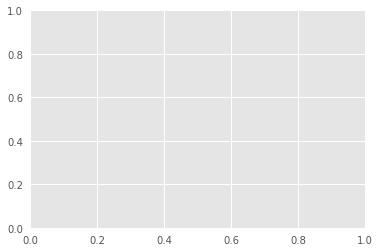

In [13]:

d = pd.read_csv('newgreen2015.csv')
Fare_amount = d['Fare_amount']
legend = ['Fare_amount', 'Total_amount']
Total_amount = d['Total_amount']
plt.plot([Fare_amount, Total_amount], color=['Red', 'green'])
plt.ylabel("Amounts")
plt.legend(legend)
plt.xticks(range(0, 10))
plt.yticks(range(1, 550))
plt.title(' Comparison between Fare Amount and Total Amount')
plt.show()



In [11]:
import folium

map_osm=folium.Map(location=[-73.99234008789062,40.69736099243164], zoom_start=6, tiles='Stamen Terrain')
folium.Marker([-73.82136535644531, 40.77962112426758], popup='Solar Power Station').add_to(map_osm)

map_osm.save('spst.html')

In [5]:
#Multiple Passengers
import datetime as dt
df = pd.read_csv('newgreen2015.csv')
print ("Max passengers at once: %d" % df['Passenger_count'].max())
print ("Average passengers at once: %d" % df['Passenger_count'].mean())

Max passengers at once: 9
Average passengers at once: 1


In [6]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], format="%Y/%m/%d %H:%M:%S")
df['hour'] = df['lpep_pickup_datetime'].dt.hour
hour_usage = pd.value_counts(df['hour']).sort_index()
print(hour_usage)

0      70152
1      57395
2      43371
3      34792
4      29007
5      18228
6      20947
7      38780
8      58189
9      58863
10     55474
11     54713
12     55526
13     59272
14     66273
15     74320
16     81011
17     89324
18     99629
19    101274
20     93432
21     86879
22     83028
23     78622
Name: hour, dtype: int64


<module 'seaborn' from '/usr/local/anaconda/anaconda3/lib/python3.6/site-packages/seaborn/__init__.py'>


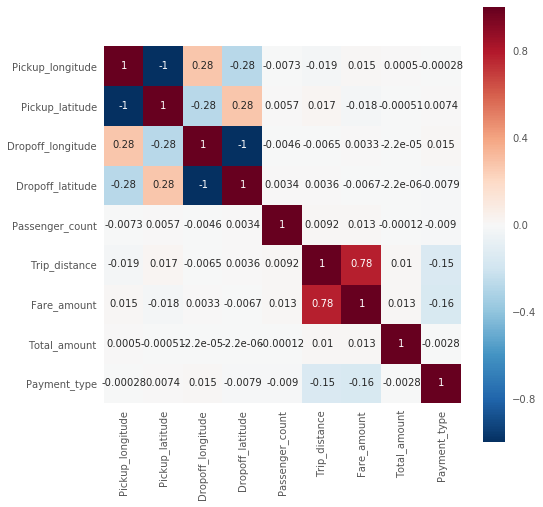

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

color = sns.color_palette()
import warnings
# To find The highest correlation coefficient is between pickup_longitude and dropoff_longitude.
warnings.filterwarnings('ignore') 
newdf = df.select_dtypes(include=[np.number])
corr = newdf.corr()
plt.figure(figsize=(8,8))
v = sns.heatmap(corr,vmax=1,square=True,annot=True)
print(sns)

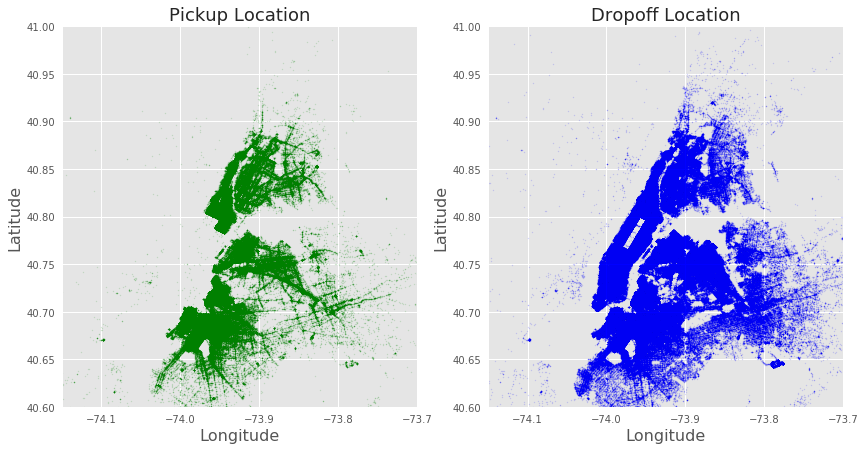

In [22]:
#Pickup Location & Dropoff Location
#size of the figure
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax1.scatter(df.Pickup_longitude,df.Pickup_latitude,s=1,color='green', alpha=0.1)
#x and y axis values
plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location',fontsize=18)
ax2 = fig.add_subplot(122)
ax2.scatter(df.Dropoff_longitude,df.Dropoff_latitude,s=1,color='blue',alpha=0.1)
plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.title('Dropoff Location',fontsize=18)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)

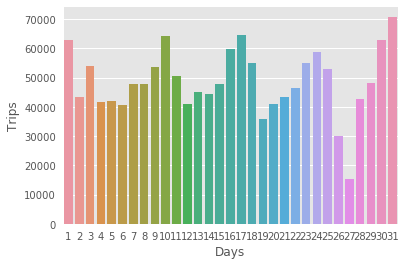

In [7]:
# Days of the Month which has more trips - Jan 2015
# North American Blizzard - Jan 26th and 27th  - bringing heavy snow and strong winds to parts of the region.

df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"])
df["Lpep_dropoff_datetime"] = pd.to_datetime(df["Lpep_dropoff_datetime"])
ax = sns.countplot(df.lpep_pickup_datetime.dt.day)
ax.set(xlabel='Days', ylabel='Trips')
plt.show()